## COMP 512 Project 

### Distributed Image Processing
**`Dr. Linda Null` | `Vignesh Zambre` | `Pritam Bhaladhare`**

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from tkinter import filedialog
import time


def readImage(path):
    return cv2.imread(path, 0)


def readImageRGB(path):
    return cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)


def medianblur(image):
    return cv2.medianBlur(image, 5)


def noisereduction(image):
    return cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)


def edgeDetection(image):
    return cv2.cvtColor(cv2.Canny(image, 60, 100), cv2.COLOR_GRAY2BGR)


def splitImage(image, parts):
    return np.array_split(image, parts)


def stitchImage(image, split, func):
    # ret = [0] * image.shape[1]
    ret = np.zeros([1, image.shape[1], 3], dtype=int)
    # print(ret)
    i = 0
    summ = 0
    for item in split:
        start_time = time.time()
        temp = func(item)
        end_time = time.time()
#         print("{} {}".format(i, end_time - start_time))
        # ret = ret + temp
        # print("ret shape {}".format(ret.shape))
        # print("temp shape {}".format(temp.shape))
        ret = np.concatenate((ret, temp))
        i = i + 1
        summ = summ + end_time - start_time
    print(summ)
    return ret


def stitchmultimage(image, bgimage, split, bgsplit, func):
    # ret = [0] * image.shape[1]
    ret = np.zeros([1, image.shape[1], 3], dtype=int)

    # print(ret)
    i = 0
    for item in split:
        temp = func(item, bgsplit[i])
        i = i+1
        # ret = ret + temp
        # print("ret shape {}".format(ret.shape))
        # print("temp shape {}".format(temp.shape))
        ret = np.concatenate((ret, temp))
    # print(ret.shape)
    return ret

def overlay(img, img2):
    return cv2.addWeighted(img, 0.6, img2, 0.4, 0)


def facedetect(image):
    img = image.copy()
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
    # read the image and convert to grayscale format
    # img = cv2.imread('multiface.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # calculate coordinates
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = img[y:y + h, x:x + w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        # draw bounding boxes around detected features
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
    # plot the image
    return img

def rotateImage(img,inverted = 0):
    (h, w) = img.shape[:2]
    center = (w / 2, h / 2)
    if inverted == 0:
        angle = 90
    else:
        angle = 270
    scale = 1.0
    M       = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(img, M, (w, h))
    return rotated


def print2images(plt, img1, img2):
    plt.subplot(121), plt.imshow(img1)
    plt.title('First Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img2)
    plt.title('Second Image'), plt.xticks([]), plt.yticks([])
    return plt


def print3images(plt, img1, img2, img3, *args):
    # print(args)
    plt.subplot(131), plt.imshow(img1, cmap=args[0])
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(img2, cmap=args[0])
    plt.title('Centralised Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(133), plt.imshow(img3, cmap=args[0])
    plt.title('Distributed Image'), plt.xticks([]), plt.yticks([])
    return plt


def print4images(plt, img1, img2, img3, img4, *args):
    # print(args)
    plt.subplot(221), plt.imshow(img1, cmap=args[0])
    plt.title('First Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(222), plt.imshow(img2, cmap=args[0])
    plt.title('Second Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(223), plt.imshow(img3, cmap=args[0])
    plt.title('Centralised Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(224), plt.imshow(img4, cmap=args[0])
    plt.title('Distributed Image'), plt.xticks([]), plt.yticks([])
    return plt

## Edge Detection

In [27]:
""" Edge Detection call """

edgeImg = readImageRGB("edge.jpg")
edge_central = edgeDetection(edgeImg)
part = 100
split = splitImage(edgeImg, part)
for i in split:
    print(i.shape)
edge_distributed = stitchImage(edgeImg, split, edgeDetection)
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
print3images(plt, edgeImg, edge_central, edge_distributed, "gray")
plt.show()



error: OpenCV(3.4.1) C:\Miniconda3\conda-bld\opencv-suite_1533128839831\work\modules\imgproc\src\color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cv::cvtColor


## Noise reduction using Median Blur

median time 0.16096997261047363
10
15000
0.0005447864532470703


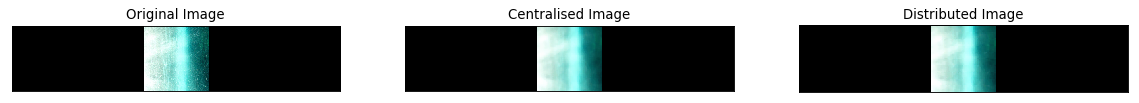

In [13]:
""" Noise reduction using Median Blur Call """
import json
import time
medianImg = readImageRGB("ocean.jpg")



medianImg = cv2.resize(medianImg,(500,100))

flag = 0 

if medianImg.shape[0] < medianImg.shape[1]:
    medianImg = rotateImage(medianImg,0)
    flag = 1


strt_time = time.time()
median_original = medianblur(medianImg)
end_time = time.time()
print("median time {}".format(end_time - strt_time))
    
part = int(medianImg.size/90000)
part= 10
print(part)
split = splitImage(medianImg, part)
print(split[1].size)
median_distributed = stitchImage(medianImg, split, medianblur)

# if flag == 1:
#     median_distributed = rotateImage(median_distributed,1)

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
print3images(plt, medianImg, median_original, median_distributed, 'gray')
plt.show()


In [128]:
1500*1000 < 2073600
960*800 < 921600

True

## Noise reduction using Non-Local Means Denoising

In [ ]:
""" Noise reduction using Non Local Means Denoising """

noiseImg = readImageRGB("noise2.jpg")
noise_original = noisereduction(noiseImg)
part = 10
split = splitImage(noiseImg, part)
noise_distributed = stitchImage(noiseImg, split, noisereduction)
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
print3images(plt, noiseImg, noise_original, noise_distributed, 'gray')
plt.show()



##  Overlay Images

In [ ]:

""" Overlay Images """

frontImage = readImageRGB("fall.jpg")
bgImage = readImageRGB("ocean.jpg")
# print(img2.shape)
overlayImage = overlay(frontImage, bgImage)
split = splitImage(frontImage, part)
bgsplit = splitImage(bgImage, part)
overlay_distributed = stitchmultimage(frontImage, bgImage, split, bgsplit,overlay)
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
print4images(plt, frontImage, bgImage, overlayImage, overlay_distributed,'gray')
plt.tight_layout()


## Face Detection

0 0.18899989128112793
1 0.17299294471740723
2 0.21000289916992188
3 0.17699933052062988
4 0.18499493598937988
5 0.16000080108642578
6 0.12799954414367676
1.2219903469085693


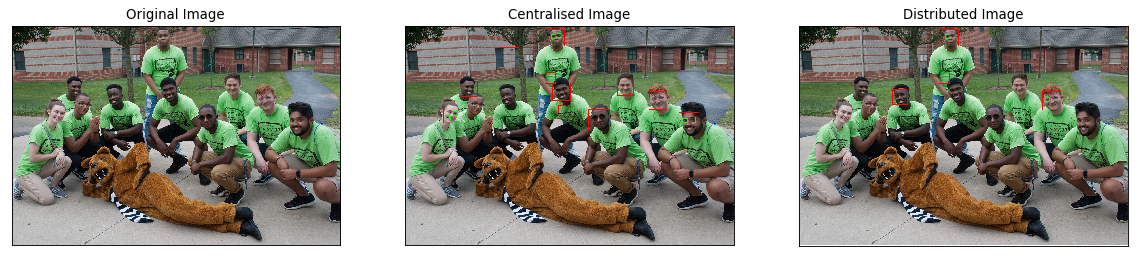

Finished


In [23]:

""" Face Detection """

faceImg = readImageRGB("multiface.jpg")
faceImg_original = facedetect(faceImg)
part = 7
split = splitImage(faceImg, part)
faceImg_distributed = stitchImage(faceImg, split, facedetect)
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
print3images(plt, faceImg, faceImg_original, faceImg_distributed, 'gray')
plt.show()

print("Finished")